HOMEWORK 3 EX 2.A

t: 0, prob: [0.50, 0.50], new_col: 1, node: 2, States: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Potential:  9.0
t: 1, prob: [0.50, 0.50], new_col: 0, node: 8, States: [1. 1. 1. 1. 1. 1. 1. 1. 0. 1.]
Potential:  7.0
t: 2, prob: [0.51, 0.49], new_col: 1, node: 3, States: [1. 1. 1. 1. 1. 1. 1. 1. 0. 1.]
Potential:  7.0
t: 3, prob: [0.51, 0.49], new_col: 1, node: 4, States: [1. 1. 1. 1. 1. 1. 1. 1. 0. 1.]
Potential:  7.0
t: 4, prob: [0.50, 0.50], new_col: 0, node: 7, States: [1. 1. 1. 1. 1. 1. 1. 0. 0. 1.]
Potential:  7.0
t: 5, prob: [0.49, 0.51], new_col: 0, node: 9, States: [1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
Potential:  8.0
t: 6, prob: [0.51, 0.49], new_col: 0, node: 0, States: [0. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
Potential:  7.0
t: 7, prob: [0.52, 0.48], new_col: 0, node: 0, States: [0. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
Potential:  7.0
t: 8, prob: [0.54, 0.46], new_col: 0, node: 3, States: [0. 1. 1. 0. 1. 1. 1. 0. 0. 0.]
Potential:  5.0
t: 9, prob: [0.50, 0.50], new_col: 1, node: 1, States: [0. 1. 1. 0. 1. 1.

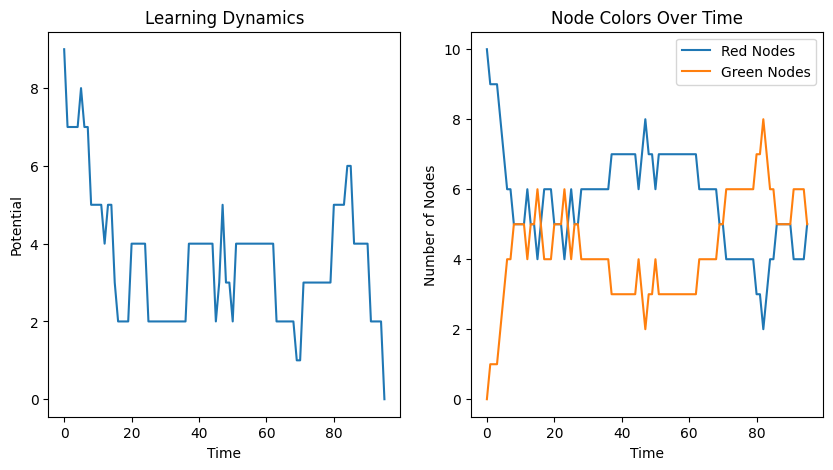

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_graph(num_nodes):
    return np.ones(num_nodes)  # Initialize all nodes to red

def update_color(node_states, node_index, eta):
    num_nodes = len(node_states)
    new_color_probabilities = []

    #compute the probability
    for color in [0, 1]:  # Assume 0 represents green and 1 represents red
        prob = np.sum(np.exp(-eta * np.sum(W[node_index, :] * (node_states == color))))
        new_color_probabilities.append(prob)
    new_color_probabilities = np.array(new_color_probabilities)
    new_color_probabilities /= np.sum(new_color_probabilities)

    #random choise of new color
    new_color = np.random.choice([0, 1], p=new_color_probabilities)
    #update color of the selected node
    node_states[node_index] = new_color

    print(f't: {t}, prob: [{new_color_probabilities[0]:.2f}, {new_color_probabilities[1]:.2f}], new_col: {new_color}, node: {node_index}, States: {node_states}')

def calculate_potential(node_states):
    # compute the potential of the iteration t
    return 0.5 * np.sum(W * (np.equal.outer(node_states, node_states)))


# Parameters
num_nodes = 10
num_iterations = 1000

# Initialize graph
node_states = initialize_graph(num_nodes)
W = np.array([
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
])

# Simulation
potential_history = [] # history of the potential
red_nodes_history = [] # history of the red nodes
green_nodes_history = [] #  history of the green nodes

for t in range(num_iterations):
    eta_coefficient = t / 100

    # Choose a random node to update
    node_index = np.random.randint(num_nodes)

    # Update color of the chosen node
    update_color(node_states, node_index, eta_coefficient)

    # Calculate and store potential at each iteration
    potential = calculate_potential(node_states)
    potential_history.append(potential)
    print('Potential: ', potential)

    # Count red and green nodes
    red_nodes = np.sum(node_states == 1)
    green_nodes = np.sum(node_states == 0)

    #Store the counts
    red_nodes_history.append(red_nodes)
    green_nodes_history.append(green_nodes)

    # Stop if potential reaches zero
    if potential == 0:
        break

# Plotting Potential
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(potential_history)
plt.xlabel('Time')
plt.ylabel('Potential')
plt.title('Learning Dynamics')

# Plotting Node Colors
plt.subplot(1, 2, 2)
plt.plot(red_nodes_history, label='Red Nodes')
plt.plot(green_nodes_history, label='Green Nodes')
plt.xlabel('Time')
plt.ylabel('Number of Nodes')
plt.title('Node Colors Over Time')
plt.legend()

plt.show()

HOMEWORK 3
EX 2.B

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import scipy.io
import networkx as nx
import matplotlib.pyplot as plt

W = scipy.io.loadmat('/content/drive/My Drive/NETWORK/Homework 3/wifi.mat')["wifi"]
coords = scipy.io.loadmat('/content/drive/My Drive/NETWORK/Homework 3/coords.mat')["coords"]

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

def initialize_graph(num_nodes):
    # CASE 1: assume that at the beginning every node has the same color
    #initial_color = random.randint(1, 8) # the initial color is choosen randomly
    #initial_condition = initial_color * np.ones(num_nodes)

    # CASE 2: assume that the initial vector is uniformally distribuited over the eigth colors
    initial_condition = np.random.randint(1, 9, 100)
    print(initial_condition)

    return initial_condition

def update_color(node_states, node_index, eta):
    num_nodes = len(node_states)
    new_color_probabilities = [] # probability vector of choosing color in iteration t

    #compute the probability
    for color in range(1,9):
        c = 2 * (node_states == color) + (np.abs(node_states-color)==1) #cost vector
        prob = np.sum(np.exp(-eta * np.sum(W[node_index, :] *c)))
        new_color_probabilities.append(prob)
    new_color_probabilities = np.array(new_color_probabilities)
    new_color_probabilities /= np.sum(new_color_probabilities)

    #random choise of new color
    new_color = np.random.choice(range(1,9), p=new_color_probabilities)
    #update color of the selected node
    node_states[node_index] = new_color
    print('ITERATION', t)
    print('Prob:', new_color_probabilities)
    print('new color', new_color)
    print('nodo', node_index)
    print('Stati', node_states)

def calculate_potential(node_states):
#compute the potential of the iteration t
    potential = 0.0
    n = len(node_states)
    for i in range(n):
      for j in range(i+1,n):
        if node_states[i] == node_states[j]:
          c = 2
        elif np.abs(node_states[i] - node_states[j]) == 1:
          c = 1
        else:
          c = 0
        potential += 0.5 * W[i,j]*c
    return potential


# Parameters
num_nodes = len(W)
num_iterations = 600

# Initialize graph
node_states = initialize_graph(num_nodes)

# Simulation
potential_history = [] # history of the potential
noise_history = [] # history of the noise

# History of colors
red_nodes_history = []
green_nodes_history = []
blue_nodes_history = []
yellow_nodes_history = []
magenta_nodes_history = []
cyan_nodes_history = []
white_nodes_history = []
black_nodes_history = []

for t in range(num_iterations):
    #Noise
    eta_coefficient = t / 100 # eta is the inverse of noise: it decrease at every time step
    if eta_coefficient !=0:
      noise = 1 / eta_coefficient
      noise_history.append(noise)

    # Choose a random node to update
    node_index = np.random.randint(num_nodes)

    # Update color of the chosen node
    update_color(node_states, node_index, eta_coefficient)

    # Calculate and store potential at each iteration
    potential = calculate_potential(node_states)
    potential_history.append(potential)
    print('Potential: ', potential)

    # Count nodes
    red_nodes = np.sum(node_states == 1)
    green_nodes = np.sum(node_states == 2)
    blue_nodes = np.sum(node_states == 3)
    yellow_nodes = np.sum(node_states == 4)
    magenta_nodes = np.sum(node_states == 5)
    cyan_nodes = np.sum(node_states == 6)
    white_nodes = np.sum(node_states == 7)
    black_nodes = np.sum(node_states == 8)

    #Store the counts
    red_nodes_history.append(red_nodes)
    green_nodes_history.append(green_nodes)
    blue_nodes_history.append(blue_nodes)
    yellow_nodes_history.append(yellow_nodes)
    magenta_nodes_history.append(magenta_nodes)
    cyan_nodes_history.append(cyan_nodes)
    white_nodes_history.append(white_nodes)
    black_nodes_history.append(black_nodes)

    # Stop if potential reaches zero
    if potential == 0:
        break

# Plotting Noise
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(noise_history)
plt.xlabel('Time')
plt.ylabel('Noise')
plt.title('Noise History')

# Plotting Potential
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(potential_history)
plt.xlabel('Time')
plt.ylabel('Potential')
plt.title('Learning Dynamics')

# Plotting Node Colors
plt.subplot(1, 2, 2)
plt.plot(red_nodes_history, label='Red Nodes')
plt.plot(green_nodes_history, label='Green Nodes')
plt.plot(blue_nodes_history, label='Blue Nodes')
plt.plot(yellow_nodes_history, label='Yellow Nodes')
plt.plot(magenta_nodes_history, label='Magenta Nodes')
plt.plot(cyan_nodes_history, label='Cyan Nodes')
plt.plot(white_nodes_history, label='White Nodes')
plt.plot(black_nodes_history, label='Black Nodes')
plt.xlabel('Time')
plt.ylabel('Number of Nodes')
plt.title('Node Colors Over Time')
plt.legend()

plt.show()

HOMEWORK 3 EX 2.C

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

def initialize_graph(num_nodes):
    # CASE 1: assume that at the beginning every node has the same color
    initial_color = random.randint(1, 8) # the initial color is choosen randomly
    initial_condition = initial_color * np.ones(num_nodes)

    # CASE 2: assume that the initial vector is uniformally distribuited over the eigth colors
    #initial_condition = np.random.randint(1, 9, 100)
    print(initial_condition)

    return initial_condition

def update_color(node_states, node_index, eta):
    num_nodes = len(node_states)
    new_color_probabilities = [] # probability vector of choosing color in iteration t

    #compute the probability
    for color in range(1,9):
        c = 2 * (node_states == color) + (np.abs(node_states-color)==1) #cost vector
        prob = np.sum(np.exp(-eta * np.sum(W[node_index, :] *c)))
        new_color_probabilities.append(prob)
    new_color_probabilities = np.array(new_color_probabilities)
    new_color_probabilities /= np.sum(new_color_probabilities)

    #random choise of new color
    new_color = np.random.choice(range(1,9), p=new_color_probabilities)
    #update color of the selected node
    node_states[node_index] = new_color
    print('ITERATION', t)
    print('Prob:', new_color_probabilities)
    print('new color', new_color)
    print('nodo', node_index)
    print('Stati', node_states)

def calculate_potential(node_states):
    #compute the potential of the iteration t
    potential = 0.0
    n = len(node_states)
    for i in range(n):
      for j in range(i+1,n):
        if node_states[i] == node_states[j]:
          c = 2
        elif np.abs(node_states[i] - node_states[j]) == 1:
          c = 1
        else:
          c = 0
        potential +=0.5 * W[i,j]*c
    return potential


# Parameters
num_nodes = len(W)
num_iterations = 600


# Initialize graph
node_states = initialize_graph(num_nodes)

# Simulation
potential_history = [] # history of the potential
noise_history = [] # history of the noise

# History of colors
red_nodes_history = []
green_nodes_history = []
blue_nodes_history = []
yellow_nodes_history = []
magenta_nodes_history = []
cyan_nodes_history = []
white_nodes_history = []
black_nodes_history = []

for t in range(num_iterations):
    #Noise
    eta_coefficient = 100 # eta here is constant
    if eta_coefficient !=0:
      noise = 1 / eta_coefficient
      noise_history.append(noise)
      print("noise",noise)

    # Choose a random node to update
    node_index = np.random.randint(num_nodes)

    # Update color of the chosen node
    update_color(node_states, node_index, eta_coefficient)

    # Calculate and store potential at each iteration
    potential = calculate_potential(node_states)
    potential_history.append(potential)
    print('Potential', potential)

    # Count nodes
    red_nodes = np.sum(node_states == 1)
    green_nodes = np.sum(node_states == 2)
    blue_nodes = np.sum(node_states == 3)
    yellow_nodes = np.sum(node_states == 4)
    magenta_nodes = np.sum(node_states == 5)
    cyan_nodes = np.sum(node_states == 6)
    white_nodes = np.sum(node_states == 7)
    black_nodes = np.sum(node_states == 8)

    #Store the counts
    red_nodes_history.append(red_nodes)
    green_nodes_history.append(green_nodes)
    blue_nodes_history.append(blue_nodes)
    yellow_nodes_history.append(yellow_nodes)
    magenta_nodes_history.append(magenta_nodes)
    cyan_nodes_history.append(cyan_nodes)
    white_nodes_history.append(white_nodes)
    black_nodes_history.append(black_nodes)

    # Stop if potential reaches zero
    if potential == 0:
        break

# Plotting Noise
# plt.figure(figsize=(10, 5))
# plt.subplot(1, 2, 1)
# plt.plot(noise_history)
# plt.xlabel('Time')
# plt.ylabel('Noise')
# plt.title('Noise History')

# Plotting Potential
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(potential_history)
plt.xlabel('Time')
plt.ylabel('Potential')
plt.title('Learning Dynamics')

# Plotting Node Colors
plt.subplot(1, 2, 2)
plt.plot(red_nodes_history, label='Red Nodes')
plt.plot(green_nodes_history, label='Green Nodes')
plt.plot(blue_nodes_history, label='Blue Nodes')
plt.plot(yellow_nodes_history, label='Yellow Nodes')
plt.plot(magenta_nodes_history, label='Magenta Nodes')
plt.plot(cyan_nodes_history, label='Cyan Nodes')
plt.plot(white_nodes_history, label='White Nodes')
plt.plot(black_nodes_history, label='Black Nodes')
plt.xlabel('Time')
plt.ylabel('Number of Nodes')
plt.title('Node Colors Over Time')
plt.legend()

plt.show()